# Introduction

## Finding Key Connectors

In [3]:
users = [
        { "id": 0, "name": "Hero" },
        { "id": 1, "name": "Dunn" },
        { "id": 2, "name": "Sue" },
        { "id": 3, "name": "Chi" },
        { "id": 4, "name": "Thor" },
        { "id": 5, "name": "Clive" },
        { "id": 6, "name": "Hicks" },
        { "id": 7, "name": "Devin" },
        { "id": 8, "name": "Kate" },
        { "id": 9, "name": "Klein" }
]

In [4]:
friendship_pairs = [(0, 1), (0, 2), (1, 2), (1, 3), (2, 3), (3, 4),
                   (4, 5), (5, 6), (5, 7), (6, 8), (7, 8), (8, 9)]

For example, the tuple (0, 1) indicates that the data scientist with id 0 (Hero) and the data scientist with id 1 (Dunn) are friends.

<img src="images/fig01-01.png" alt="Analytics, Data Science, Machine Learning" style="width: 800px;"/>

In [5]:
# Find friends
def find_friends(node_id, friendship_pairs):
    '''
    Returns friends of a specific person using friendship_pairs.
    
    Args:
        node_id (int): The id of a node.
        friendship_map (list): a list of (X, Y) tuples, where X and Y are nodes id.

    Returns:
        friends (list): a list of friends id.
    '''
    friends = []
    for friendship in friendship_pairs:
        if friendship[0] == node_id:
            friends.append(friendship[1])
        if friendship[1] == node_id:
            friends.append(friendship[0])
    return friends

In [6]:
find_friends(1, friendship_pairs)

[0, 2, 3]

In [7]:
# Initialize the dict with an empty list for each user id:
friendships = {user["id"]: [] for user in users}
friendships

{0: [], 1: [], 2: [], 3: [], 4: [], 5: [], 6: [], 7: [], 8: [], 9: []}

In [8]:
# And loop over the friendship pairs to populate it:
for i, j in friendship_pairs:
    friendships[i].append(j)  # Add j as a friend of user i
    friendships[j].append(i)  # Add i as a friend of user j

In [9]:
friendships

{0: [1, 2],
 1: [0, 2, 3],
 2: [0, 1, 3],
 3: [1, 2, 4],
 4: [3, 5],
 5: [4, 6, 7],
 6: [5, 8],
 7: [5, 8],
 8: [6, 7, 9],
 9: [8]}

## What's the average number of connections?

In [10]:
def number_of_friends(user, friendships):
    '''
    Returns a number friends of a specific user and friendships.
    
    Args:
        user (list): a list of dics { "id": 0, "name": "Hero" }
        friendships (dict): a list of dics {0: [1, 2]}

    Returns:
        friends_count (int): number of friends of a specified user.
    '''
    user_id = user["id"]
    #print(user_id)
    friend_ids = friendships[user_id]
    #print(friend_ids)
    friends_count = len(friend_ids)
    #print(friends_count)
    return friends_count

In [11]:
number_of_friends(users[1], friendships)

3

In [12]:
total_connections = sum(number_of_friends(user, friendships) for user in users)
total_connections

24

In [13]:
num_users = len(users)
num_users

10

In [14]:
avg_connections = total_connections / num_users
avg_connections

2.4

## Who are the most connected people?

In [15]:
# Create a list (user_id, number_of_friends)
num_friends_by_id = [(user["id"], number_of_friends(user, friendships)) for user in users]
num_friends_by_id

[(0, 2),
 (1, 3),
 (2, 3),
 (3, 3),
 (4, 2),
 (5, 3),
 (6, 2),
 (7, 2),
 (8, 3),
 (9, 1)]

In [16]:
# Compute the network metric degree centrality
num_friends_by_id.sort(                                # Sort the list
       key=lambda id_and_friends: id_and_friends[1],   # by num_friends
       reverse=True)                                   # largest to smallest

# Each pair is (user_id, num_friends):
# [(1, 3), (2, 3), (3, 3), (5, 3), (8, 3),
#  (0, 2), (4, 2), (6, 2), (7, 2), (9, 1)]
num_friends_by_id

[(1, 3),
 (2, 3),
 (3, 3),
 (5, 3),
 (8, 3),
 (0, 2),
 (4, 2),
 (6, 2),
 (7, 2),
 (9, 1)]

<img src="images/fig01-02.png" alt="Analytics, Data Science, Machine Learning" style="width: 800px;"/>

## Data Scientists You May Know suggester
Find friends of friends

In [17]:
# Find friends of friends 1 (bad)
def find_friends_of_friends(node_id, friendship_pairs):
    '''
    '''
    fof = [] # firends of friends
    friends = find_friends(node_id, friendship_pairs)
    for friend in friends:
        fof.append(find_friends(friend, friendship_pairs))
    return friends, fof

In [18]:
print(find_friends_of_friends(0, friendship_pairs))

([1, 2], [[0, 2, 3], [0, 1, 3]])


In [19]:
# Find friends of friends 2 (bad)
def find_friends_of_friends2(user):
    return [foaf_id
            for friend_id in friendships[user["id"]]
            for foaf_id in friendships[friend_id]]

In [20]:
find_friends_of_friends2(users[0])

[0, 2, 3, 0, 1, 3]

In [21]:
import itertools

# Find friends of friends 3 (better)
def find_friends_of_friends3(node_id, friendship_pairs):
    '''
    '''
    fof = [] # firends of friends
    friends = find_friends(node_id, friendship_pairs)
    for friend in friends:
        fof.append(find_friends(friend, friendship_pairs)) 
    # combine lists into one
    fof_final = list(itertools.chain.from_iterable(fof))
    # eliminate duplicates
    fof_final = set(fof_final)
    return friends, fof_final

In [22]:
print(find_friends_of_friends3(0, friendship_pairs))

([1, 2], {0, 1, 2, 3})


In [23]:
# Find friends of friends 4 (better)
def find_friends_of_friends4(node_id, friendship_pairs):
    '''
    '''
    fofs = [] # friends of friends (without repetitions)
    # find friends of node_id
    friends = find_friends(node_id, friendship_pairs)
    # for each node_id's friend find their friends
    for friend in friends:
        fof = find_friends(friend, friendship_pairs)
        #print(fof)
        # For each found fof, add to the final list only those who are not in the list, 
        # are not node_id and are not node_id's friends
        for f in fof:
            #print(type(f))
            if (f not in fofs) and (f != node_id) and (f not in friends):
                fofs.append(f)
    return friends, fofs

In [24]:
print(find_friends_of_friends4(3, friendship_pairs))

([1, 2, 4], [0, 5])


In [25]:
# Find friends of friends 5 (better?)
from collections import Counter                   # not loaded by default

def friends_of_friends5(user):
    user_id = user["id"]
    return Counter(
        foaf_id
        for friend_id in friendships[user_id]     # For each of my friends,
        for foaf_id in friendships[friend_id]     # find their friends
        if foaf_id != user_id                     # who aren't me
        and foaf_id not in friendships[user_id]   # and aren't my friends.
    )


print(friends_of_friends5(users[3]))               # Counter({0: 2, 5: 1})

Counter({0: 2, 5: 1})


Chi (id 3) has two mutual friends with Hero (id 0) and one with Clive (id 5).

## Find ids of all sharing the same interest
(user_id, interest)

In [26]:
interests = [
    (0, "Hadoop"), (0, "Big Data"), (0, "HBase"), (0, "Java"),
    (0, "Spark"), (0, "Storm"), (0, "Cassandra"),
    (1, "NoSQL"), (1, "MongoDB"), (1, "Cassandra"), (1, "HBase"),
    (1, "Postgres"), (2, "Python"), (2, "scikit-learn"), (2, "scipy"),
    (2, "numpy"), (2, "statsmodels"), (2, "pandas"), (3, "R"), (3, "Python"),
    (3, "statistics"), (3, "regression"), (3, "probability"),
    (4, "machine learning"), (4, "regression"), (4, "decision trees"),
    (4, "libsvm"), (5, "Python"), (5, "R"), (5, "Java"), (5, "C++"),
    (5, "Haskell"), (5, "programming languages"), (6, "statistics"),
    (6, "probability"), (6, "mathematics"), (6, "theory"),
    (7, "machine learning"), (7, "scikit-learn"), (7, "Mahout"),
    (7, "neural networks"), (8, "neural networks"), (8, "deep learning"),
    (8, "Big Data"), (8, "artificial intelligence"), (9, "Hadoop"),
    (9, "Java"), (9, "MapReduce"), (9, "Big Data")
]

In [27]:
search_for = "Java"
ids = []
for uid, interest in interests:
    if interest == search_for:
        ids.append(uid)
ids

[0, 5, 9]

In [28]:
target_interest = search_for
[uid
for uid, interest in interests
if interest == search_for]

[0, 5, 9]

In [29]:
from collections import defaultdict

# Keys are interests, values are lists of user_ids with that interest
user_ids_by_interest = defaultdict(list)

for user_id, interest in interests:
    user_ids_by_interest[interest].append(user_id)
    
user_ids_by_interest

defaultdict(list,
            {'Hadoop': [0, 9],
             'Big Data': [0, 8, 9],
             'HBase': [0, 1],
             'Java': [0, 5, 9],
             'Spark': [0],
             'Storm': [0],
             'Cassandra': [0, 1],
             'NoSQL': [1],
             'MongoDB': [1],
             'Postgres': [1],
             'Python': [2, 3, 5],
             'scikit-learn': [2, 7],
             'scipy': [2],
             'numpy': [2],
             'statsmodels': [2],
             'pandas': [2],
             'R': [3, 5],
             'statistics': [3, 6],
             'regression': [3, 4],
             'probability': [3, 6],
             'machine learning': [4, 7],
             'decision trees': [4],
             'libsvm': [4],
             'C++': [5],
             'Haskell': [5],
             'programming languages': [5],
             'mathematics': [6],
             'theory': [6],
             'Mahout': [7],
             'neural networks': [7, 8],
             'deep learning': 

In [30]:
# Keys are user_ids, values are lists of interests for that user_id.
interests_by_user_id = defaultdict(list)

for user_id, interest in interests:
    interests_by_user_id[user_id].append(interest)

interests_by_user_id

defaultdict(list,
            {0: ['Hadoop',
              'Big Data',
              'HBase',
              'Java',
              'Spark',
              'Storm',
              'Cassandra'],
             1: ['NoSQL', 'MongoDB', 'Cassandra', 'HBase', 'Postgres'],
             2: ['Python',
              'scikit-learn',
              'scipy',
              'numpy',
              'statsmodels',
              'pandas'],
             3: ['R', 'Python', 'statistics', 'regression', 'probability'],
             4: ['machine learning', 'regression', 'decision trees', 'libsvm'],
             5: ['Python',
              'R',
              'Java',
              'C++',
              'Haskell',
              'programming languages'],
             6: ['statistics', 'probability', 'mathematics', 'theory'],
             7: ['machine learning',
              'scikit-learn',
              'Mahout',
              'neural networks'],
             8: ['neural networks',
              'deep learning',
       

## Who has the most interests in common with a given user?
1. Iterate over the user's interests
2. For each interest, iterate over the other users with that interest.
3. Keep count of how many times we see each other user.

In [31]:
def most_common_interests_with(user):
    return Counter(
        interested_user_id
        for interest in interests_by_user_id[user["id"]]
        for interested_user_id in user_ids_by_interest[interest]
        if interested_user_id != user["id"]
    )

In [32]:
most_common_interests_with(users[0])

Counter({9: 3, 8: 1, 1: 2, 5: 1})

## Salaries and Experience
salary in USD,
tenure in years

In [33]:
salaries_and_tenures = [(83000, 8.7), (88000, 8.1),
                        (48000, 0.7), (76000, 6),
                        (69000, 6.5), (76000, 7.5),
                        (60000, 2.5), (83000, 10),
                        (48000, 1.9), (63000, 4.2)]

In [34]:
salaries_and_tenures.sort( # Sort the list
       key=lambda salaries_and_tenures: salaries_and_tenures[1],   # by num_friends
       reverse=False)
salaries_and_tenures

[(48000, 0.7),
 (48000, 1.9),
 (60000, 2.5),
 (63000, 4.2),
 (76000, 6),
 (69000, 6.5),
 (76000, 7.5),
 (88000, 8.1),
 (83000, 8.7),
 (83000, 10)]

In [35]:
from matplotlib import pyplot as plt
%matplotlib inline

In [36]:
salaries = [salary for salary, tenure in salaries_and_tenures]
salaries

[48000, 48000, 60000, 63000, 76000, 69000, 76000, 88000, 83000, 83000]

In [37]:
tenures = [tenure for salary, tenure in salaries_and_tenures]
tenures

[0.7, 1.9, 2.5, 4.2, 6, 6.5, 7.5, 8.1, 8.7, 10]

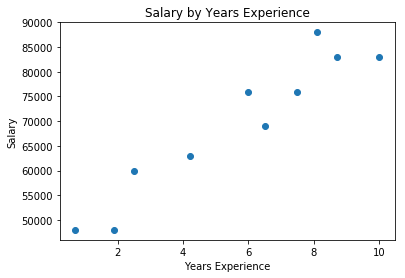

In [38]:
plt.scatter(tenures, salaries)
plt.title("Salary by Years Experience")
plt.ylabel("Salary")
plt.xlabel("Years Experience")
plt.show();

## What is an average salary for each tenure?

In [39]:
# Keys are years, values are lists of the salaries for each tenure.
salary_by_tenure = defaultdict(list)
salary_by_tenure

defaultdict(list, {})

In [40]:
for salary, tenure in salaries_and_tenures:
    salary_by_tenure[tenure].append(salary)
    
salary_by_tenure

defaultdict(list,
            {0.7: [48000],
             1.9: [48000],
             2.5: [60000],
             4.2: [63000],
             6: [76000],
             6.5: [69000],
             7.5: [76000],
             8.1: [88000],
             8.7: [83000],
             10: [83000]})

In [41]:
# Keys are years, each value is average salary for that tenure.
average_salary_by_tenure = {
    tenure: sum(salaries) / len(salaries)
    for tenure, salaries in salary_by_tenure.items()
}

average_salary_by_tenure

{0.7: 48000.0,
 1.9: 48000.0,
 2.5: 60000.0,
 4.2: 63000.0,
 6: 76000.0,
 6.5: 69000.0,
 7.5: 76000.0,
 8.1: 88000.0,
 8.7: 83000.0,
 10: 83000.0}

## Bucket tenures and then calculate average salaries

In [42]:
def tenure_bucket(tenure):
    if tenure < 2:
        return "less than two"
    elif tenure < 5:
        return "between two and five"
    else:
        return "more than five"

In [43]:
# Keys are tenure buckets, values are lists of salaries for that bucket.
salary_by_tenure_bucket = defaultdict(list)

for salary, tenure in salaries_and_tenures:
    bucket = tenure_bucket(tenure)
    salary_by_tenure_bucket[bucket].append(salary)
    
salary_by_tenure_bucket

defaultdict(list,
            {'less than two': [48000, 48000],
             'between two and five': [60000, 63000],
             'more than five': [76000, 69000, 76000, 88000, 83000, 83000]})

In [44]:
# Keys are tenure buckets, values are average salary for that bucket
average_salary_by_bucket = {
  tenure_bucket: sum(salaries) / len(salaries)
  for tenure_bucket, salaries in salary_by_tenure_bucket.items()
}

average_salary_by_bucket

{'less than two': 48000.0,
 'between two and five': 61500.0,
 'more than five': 79166.66666666667}

In [45]:
48/79

0.6075949367088608

Data scientists with more than 5 years' experience earn 60% more than data scientists with little or no experience!

## Topics of Interests - Count the Words
1. Lowercase eacg interest.
2. Split it into words.
3. Count the results.

In [48]:
interests

[(0, 'Hadoop'),
 (0, 'Big Data'),
 (0, 'HBase'),
 (0, 'Java'),
 (0, 'Spark'),
 (0, 'Storm'),
 (0, 'Cassandra'),
 (1, 'NoSQL'),
 (1, 'MongoDB'),
 (1, 'Cassandra'),
 (1, 'HBase'),
 (1, 'Postgres'),
 (2, 'Python'),
 (2, 'scikit-learn'),
 (2, 'scipy'),
 (2, 'numpy'),
 (2, 'statsmodels'),
 (2, 'pandas'),
 (3, 'R'),
 (3, 'Python'),
 (3, 'statistics'),
 (3, 'regression'),
 (3, 'probability'),
 (4, 'machine learning'),
 (4, 'regression'),
 (4, 'decision trees'),
 (4, 'libsvm'),
 (5, 'Python'),
 (5, 'R'),
 (5, 'Java'),
 (5, 'C++'),
 (5, 'Haskell'),
 (5, 'programming languages'),
 (6, 'statistics'),
 (6, 'probability'),
 (6, 'mathematics'),
 (6, 'theory'),
 (7, 'machine learning'),
 (7, 'scikit-learn'),
 (7, 'Mahout'),
 (7, 'neural networks'),
 (8, 'neural networks'),
 (8, 'deep learning'),
 (8, 'Big Data'),
 (8, 'artificial intelligence'),
 (9, 'Hadoop'),
 (9, 'Java'),
 (9, 'MapReduce'),
 (9, 'Big Data')]

In [47]:
words_and_counts = Counter(word
                           for user, interest in interests
                           for word in interest.lower().split())

words_and_counts

Counter({'hadoop': 2,
         'big': 3,
         'data': 3,
         'hbase': 2,
         'java': 3,
         'spark': 1,
         'storm': 1,
         'cassandra': 2,
         'nosql': 1,
         'mongodb': 1,
         'postgres': 1,
         'python': 3,
         'scikit-learn': 2,
         'scipy': 1,
         'numpy': 1,
         'statsmodels': 1,
         'pandas': 1,
         'r': 2,
         'statistics': 2,
         'regression': 2,
         'probability': 2,
         'machine': 2,
         'learning': 3,
         'decision': 1,
         'trees': 1,
         'libsvm': 1,
         'c++': 1,
         'haskell': 1,
         'programming': 1,
         'languages': 1,
         'mathematics': 1,
         'theory': 1,
         'mahout': 1,
         'neural': 2,
         'networks': 2,
         'deep': 1,
         'artificial': 1,
         'intelligence': 1,
         'mapreduce': 1})

In [51]:
for word, count in words_and_counts.most_common():
    if count > 1:
        print(word, count)

big 3
data 3
java 3
python 3
learning 3
hadoop 2
hbase 2
cassandra 2
scikit-learn 2
r 2
statistics 2
regression 2
probability 2
machine 2
neural 2
networks 2


In [52]:
!env

TERM_PROGRAM=iTerm.app
TERM=xterm-color
SHELL=/usr/local/bin/fish
CLICOLOR=1
OMF_CONFIG=/Users/ksatola/.config/omf
TMPDIR=/var/folders/qk/0l3zx9w11959pqp8tr5s_1780000gn/T/
Apple_PubSub_Socket_Render=/private/tmp/com.apple.launchd.cbI9VL1rSv/Render
TERM_PROGRAM_VERSION=3.2.8
TERM_SESSION_ID=w0t3p0:551B4E77-88AA-4B00-BA4B-60230FEBBCE1
USER=ksatola
COMMAND_MODE=unix2003
SSH_AUTH_SOCK=/private/tmp/com.apple.launchd.xSY17kVArT/Listeners
__CF_USER_TEXT_ENCODING=0x1F5:0:2
JPY_PARENT_PID=31697
PAGER=cat
PATH=/Users/ksatola/anaconda3/bin:/usr/local/opt/ruby/bin:/Users/ksatola/anaconda3/bin:/Users/ksatola/.pyenv/shims:/Users/ksatola/.pyenv/bin:/usr/local/bin:/usr/bin:/bin:/usr/sbin:/sbin
PWD=/Users/ksatola/Documents/git/data-science-from-scratch
MPLBACKEND=module://ipykernel.pylab.backend_inline
ITERM_PROFILE=Default
XPC_FLAGS=0x0
XPC_SERVICE_NAME=0
SHLVL=2
HOME=/Users/ksatola
COLORFGBG=7;0
OMF_PATH=/Users/ksatola/.local/share/omf
ITERM_SESSION_ID=w0t3p0:551B4E77-88AA-4B00-BA4B-60230FEBBCE1
LOGN

In [ ]:
! conda create -n dsfs python=3.6

Solving environment: done

## Package Plan ##

  environment location: /Users/ksatola/anaconda3/envs/dsfs

  added / updated specs:
    - python=3.6


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    ca-certificates-2019.5.15  |                0         133 KB
    certifi-2019.3.9           |           py36_0         155 KB
    libedit-3.1.20181209       |       hb402a30_0         159 KB
    openssl-1.1.1c             |       h1de35cc_1         3.4 MB
    pip-19.1.1                 |           py36_0         1.9 MB
    python-3.6.8               |       haf84260_0        20.5 MB
    setuptools-41.0.1          |           py36_0         641 KB
    sqlite-3.28.0              |       ha441bb4_0         2.3 MB
    wheel-0.33.4               |           py36_0          39 KB
    ------------------------------------------------------------
                                           Total:      

In [1]:
x = [1, 2]
tuple1 = (1, x)

In [2]:
tuple1

(1, [1, 2])

In [3]:
x.append(3)

In [4]:
tuple1

(1, [1, 2, 3])